In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sinter

from pathlib import Path
import sys
sys.path.append(str(Path("..").resolve()))

from rotated_surface_code import RotatedSurfaceCode
import os

# MWPM

In [27]:
tasks = []
for d in [5, 7, 9, 11]:
    code = RotatedSurfaceCode(d=d)
    for p in np.arange(0.001, 0.016, 0.002): # physical error rate
        circuit = code.make_circuit_memory_z_experiment( # full circuit-level noise
            rounds=d,
            data_qubit_error_rate=p,
            prep_error_rate=p,
            meas_error_rate=p,
            gate1_error_rate=p,
            gate2_error_rate=p,
            keep_z_detectors_only=True,
        )
        tasks.append(
            sinter.Task(
                circuit=circuit,
                decoder='pymatching',
                json_metadata={
                    'p': p,
                    'd': d,
                    'rounds': d
                }
            )
        )

collected_stats = sinter.collect(
    num_workers=os.cpu_count() - 1,
    tasks=tasks,
    max_shots=50_000_000,
    max_errors=50,
    print_progress=True,
)

Starting 7 workers...
32 tasks left:
  workers    decoder        eta shots_left errors_left json_metadata                        
        1 pymatching          ?   50000000          50 p=0.001,d=5,rounds=5                 
        1 pymatching          ?   50000000          50 p=0.003,d=5,rounds=5                 
        1 pymatching          ?   50000000          50 p=0.005,d=5,rounds=5                 
        1 pymatching          ?   50000000          50 p=0.007,d=5,rounds=5                 
        1 pymatching [draining]   49998703         -41 p=0.009000000000000001,d=5,rounds=5  
        1 pymatching          ?   50000000          50 p=0.011,d=5,rounds=5                 
        1 pymatching          ?   50000000          50 p=0.013000000000000001,d=5,rounds=5  
        0 pymatching        ?·∞   50000000          50 p=0.015,d=5,rounds=5                 
        0 pymatching        ?·∞   50000000          50 p=0.001,d=7,rounds=7                 
        0 pymatching        ?·∞  

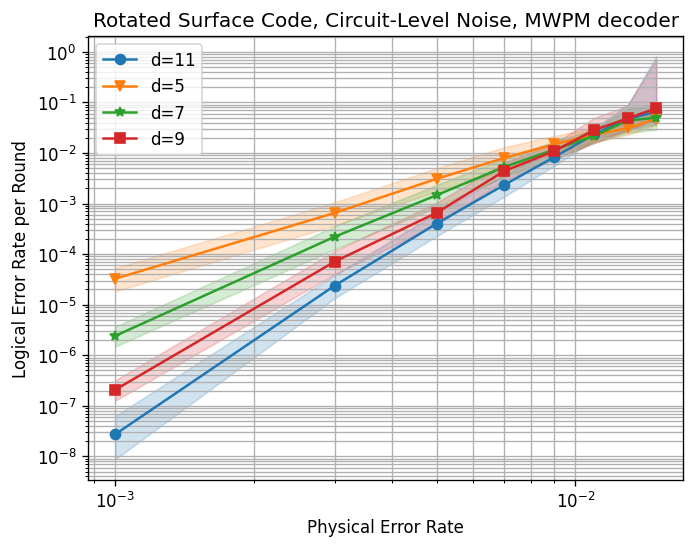

In [28]:
# Plot the error rate vs. physical error rate
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: dict(
        label="d={}".format(stats.json_metadata['d'])
    ),
    failure_units_per_shot_func=lambda stats: stats.json_metadata['rounds'],
)
ax.loglog()
ax.set_title("Rotated Surface Code, Circuit-Level Noise, MWPM decoder")
ax.set_xlabel("Physical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)

# BP+OSD

In [ ]:
from stimbposd import SinterDecoder_BPOSD


tasks = []
for d in [3, 5, 7]:
    code = RotatedSurfaceCode(d=d)
    for p in np.arange(0.001, 0.016, 0.002): # physical error rate
        circuit = code.make_circuit_memory_z_experiment( # full circuit-level noise
            rounds=d,
            data_qubit_error_rate=p,
            prep_error_rate=p,
            meas_error_rate=p,
            gate1_error_rate=p,
            gate2_error_rate=p,
            keep_z_detectors_only=True,
        )
        tasks.append(
            sinter.Task(
                circuit=circuit,
                decoder='bposd',
                json_metadata={
                    'p': p,
                    'd': d,
                    'rounds': d
                }
            )
        )

collected_stats = sinter.collect(
    num_workers=os.cpu_count() - 1,
    tasks=tasks,
    custom_decoders={
        'bposd': SinterDecoder_BPOSD(),
    },
    max_shots=500_000,
    max_errors=50,
    print_progress=True,
)

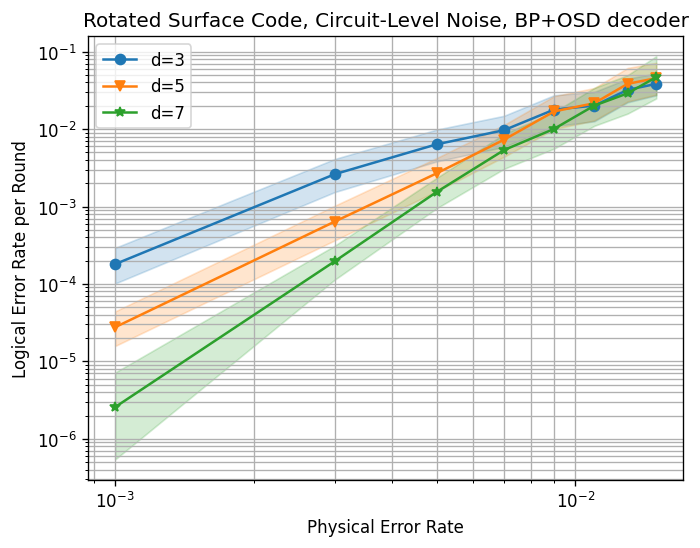

In [13]:
# Plot the error rate vs. physical error rate
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: dict(
        label="d={}".format(stats.json_metadata['d'])
    ),
    failure_units_per_shot_func=lambda stats: stats.json_metadata['rounds'],
)
ax.loglog()
ax.set_title("Rotated Surface Code, Circuit-Level Noise, BP+OSD decoder")
ax.set_xlabel("Physical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)

# BP

In [ ]:
from relay_bp.stim import SinterDecoder_MSLBP


tasks = []
for d in [5, 7, 9, 11]:
    code = RotatedSurfaceCode(d=d)
    for p in np.arange(0.001, 0.016, 0.002): # physical error rate
        circuit = code.make_circuit_memory_z_experiment( # full circuit-level noise
            rounds=d,
            data_qubit_error_rate=p,
            prep_error_rate=p,
            meas_error_rate=p,
            gate1_error_rate=p,
            gate2_error_rate=p,
            keep_z_detectors_only=True,
        )
        tasks.append(
            sinter.Task(
                circuit=circuit,
                decoder='bp',
                json_metadata={
                    'p': p,
                    'd': d,
                    'rounds': d
                }
            )
        )

collected_stats = sinter.collect(
    num_workers=os.cpu_count() - 1,
    tasks=tasks,
    custom_decoders={
        'bp': SinterDecoder_MSLBP(max_iter=100, parallel=True),
    },
    max_shots=1_000_000,
    max_errors=100,
    print_progress=True,
)

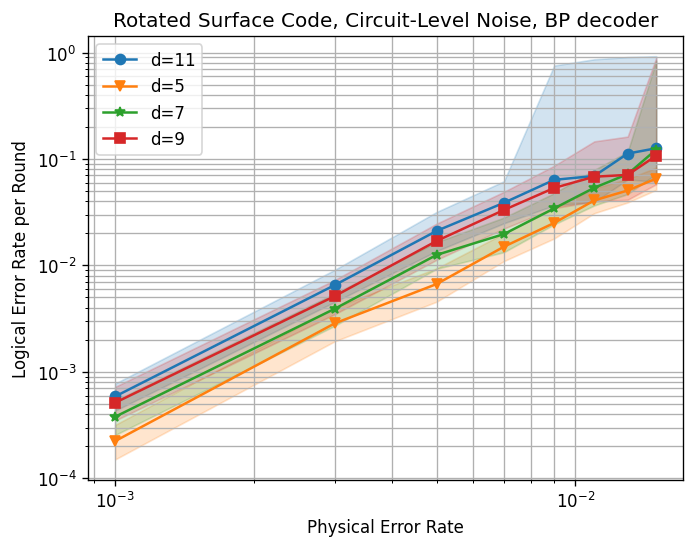

In [22]:
# Plot the error rate vs. physical error rate
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: dict(
        label="d={}".format(stats.json_metadata['d'])
    ),
    failure_units_per_shot_func=lambda stats: stats.json_metadata['rounds'],
)
ax.loglog()
ax.set_title("Rotated Surface Code, Circuit-Level Noise, BP decoder")
ax.set_xlabel("Physical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)

# MemBP

In [ ]:
from relay_bp.stim import SinterDecoder_MemBP

gamma0_optimized = 0.55

tasks = []
for d in [5, 7, 9, 11]:
    code = RotatedSurfaceCode(d=d)
    for p in np.arange(0.001, 0.016, 0.002): # physical error rate
        circuit = code.make_circuit_memory_z_experiment( # full circuit-level noise
            rounds=d,
            data_qubit_error_rate=p,
            prep_error_rate=p,
            meas_error_rate=p,
            gate1_error_rate=p,
            gate2_error_rate=p,
            keep_z_detectors_only=True,
        )
        tasks.append(
            sinter.Task(
                circuit=circuit,
                decoder='mem-bp',
                json_metadata={
                    'p': p,
                    'd': d,
                    'rounds': d
                }
            )
        )

collected_stats = sinter.collect(
    num_workers=os.cpu_count() - 1,
    tasks=tasks,
    custom_decoders={
        'mem-bp': SinterDecoder_MemBP(max_iter=100, parallel=True, gamma0=gamma0_optimized),
    },
    max_shots=1_000_000,
    max_errors=100,
    print_progress=True,
)

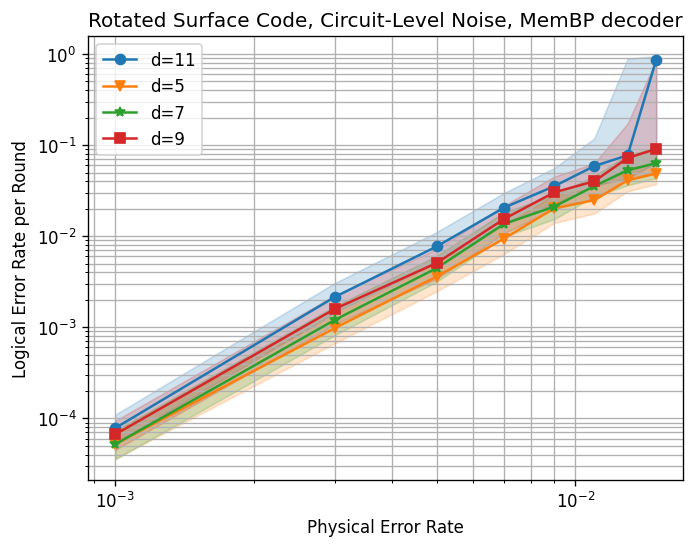

In [24]:
# Plot the error rate vs. physical error rate
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: dict(
        label="d={}".format(stats.json_metadata['d'])
    ),
    failure_units_per_shot_func=lambda stats: stats.json_metadata['rounds'],
)
ax.loglog()
ax.set_title("Rotated Surface Code, Circuit-Level Noise, MemBP decoder")
ax.set_xlabel("Physical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)

# RelayBP

In [ ]:
from relay_bp.stim import SinterDecoder_RelayBP

relay_bp_params = dict(
    alpha=1.0,
    gamma0=0.55,
    gamma_dist_interval=[-0.25453802248, 0.98518104204],
    num_sets=60,
    pre_iter=80,
    set_max_iter=60,
    stop_nconv=1
)

tasks = []
for d in [5, 7, 9, 11]:
    code = RotatedSurfaceCode(d=d)
    for p in np.arange(0.001, 0.016, 0.002): # physical error rate
        circuit = code.make_circuit_memory_z_experiment( # full circuit-level noise
            rounds=d,
            data_qubit_error_rate=p,
            prep_error_rate=p,
            meas_error_rate=p,
            gate1_error_rate=p,
            gate2_error_rate=p,
            keep_z_detectors_only=True,
        )
        tasks.append(
            sinter.Task(
                circuit=circuit,
                decoder='relay-bp',
                json_metadata={
                    'p': p,
                    'd': d,
                    'rounds': d
                }
            )
        )

collected_stats = sinter.collect(
    num_workers=os.cpu_count() - 1,
    tasks=tasks,
    custom_decoders={
        'relay-bp': SinterDecoder_RelayBP(**relay_bp_params),
    },
    max_shots=1_000_000,
    max_errors=100,
    print_progress=True,
)

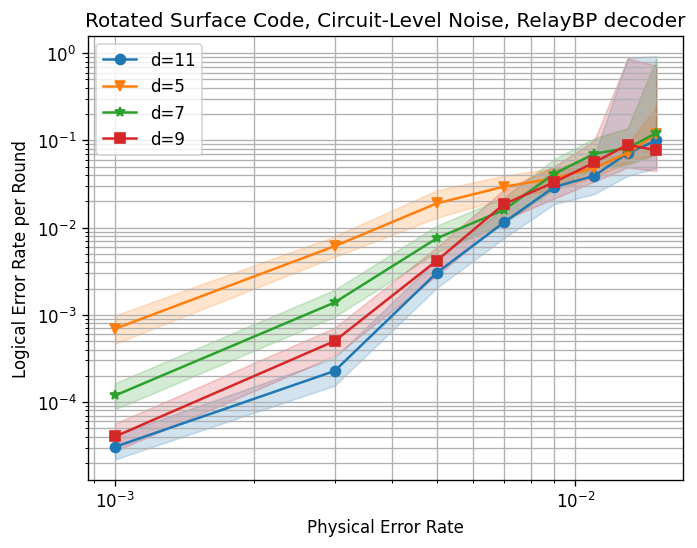

In [3]:
# Plot the error rate vs. physical error rate
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: dict(
        label="d={}".format(stats.json_metadata['d'])
    ),
    failure_units_per_shot_func=lambda stats: stats.json_metadata['rounds'],
)
ax.loglog()
ax.set_title("Rotated Surface Code, Circuit-Level Noise, RelayBP decoder")
ax.set_xlabel("Physical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)

# RelayBP, light version

In [ ]:
from relay_bp.stim import SinterDecoder_RelayBP

relay_bp_params = dict(
    alpha=1.0,
    gamma0=0.55,
    gamma_dist_interval=[-0.25453802248, 0.98518104204],
    num_sets=2,
    pre_iter=50,
    set_max_iter=30,
    stop_nconv=1
)

tasks = []
for d in [5, 7, 9, 11]:
    code = RotatedSurfaceCode(d=d)
    for p in np.arange(0.001, 0.016, 0.002): # physical error rate
        circuit = code.make_circuit_memory_z_experiment( # full circuit-level noise
            rounds=d,
            data_qubit_error_rate=p,
            prep_error_rate=p,
            meas_error_rate=p,
            gate1_error_rate=p,
            gate2_error_rate=p,
            keep_z_detectors_only=True,
        )
        tasks.append(
            sinter.Task(
                circuit=circuit,
                decoder='relay-bp',
                json_metadata={
                    'p': p,
                    'd': d,
                    'rounds': d
                }
            )
        )

collected_stats = sinter.collect(
    num_workers=os.cpu_count() - 1,
    tasks=tasks,
    custom_decoders={
        'relay-bp': SinterDecoder_RelayBP(**relay_bp_params),
    },
    max_shots=1_000_000,
    max_errors=100,
    print_progress=True,
)

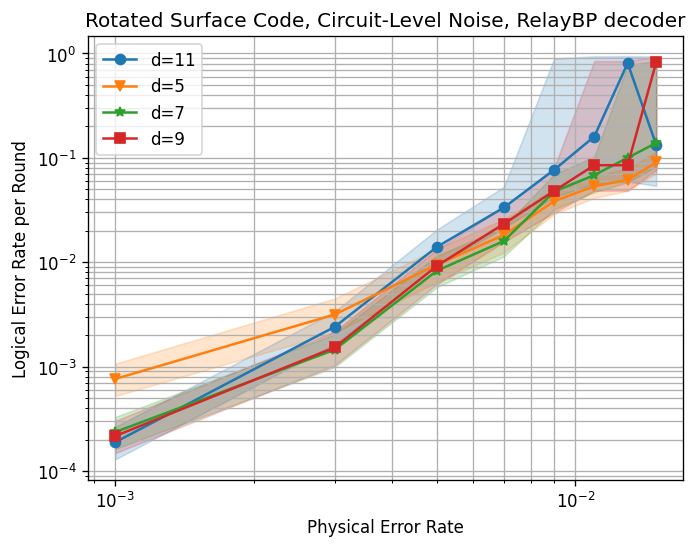

In [5]:
# Plot the error rate vs. physical error rate
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: dict(
        label="d={}".format(stats.json_metadata['d'])
    ),
    failure_units_per_shot_func=lambda stats: stats.json_metadata['rounds'],
)
ax.loglog()
ax.set_title("Rotated Surface Code, Circuit-Level Noise, RelayBP decoder")
ax.set_xlabel("Physical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)